In [1]:
import torch.nn as nn
from torch.optim import SGD, Adam
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss

from LeNet import LeNet
from LeNet import C1, C3_simplified, LeNet_C3, C5
from LeNet import S2_avgPooling, S2_maxPooling, S4_avgPooling, S4_maxPooling, Subsampler
from LeNet import F6, RBF
from LeNet import Reshape, Flatten

%load_ext autoreload
%autoreload 2

In [2]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [3]:
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        m.reset_parameters()

In [30]:
LeNet_5 = LeNet(
    Reshape(),
    C1,
    nn.Sigmoid(),
    Subsampler(in_channels=6),
    LeNet_C3(),
    nn.Sigmoid(),
    Subsampler(in_channels=16),
    Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5.initialize(learning_rate=0.2)
LeNet_5.apply(init_weights)
LeNet_5.train(mode=True, data=mnist_train, epochs=30)

[epoch 1, batch 46] loss: 2.311766391215117
[epoch 1, batch 92] loss: 2.3086953111316846
[epoch 1, batch 138] loss: 2.308476717575737
[epoch 1, batch 184] loss: 2.3082982871843423
[epoch 1, batch 230] loss: 2.3073884715204653
[epoch 2, batch 46] loss: 2.5606724127479223
[epoch 2, batch 92] loss: 2.3068096689555957
[epoch 2, batch 138] loss: 2.306613351987756
[epoch 2, batch 184] loss: 2.3073779344558716
[epoch 2, batch 230] loss: 2.3069337969240933
[epoch 3, batch 46] loss: 2.5595877533373623
[epoch 3, batch 92] loss: 2.3081433928531148
[epoch 3, batch 138] loss: 2.307197057682535
[epoch 3, batch 184] loss: 2.3076077077699746
[epoch 3, batch 230] loss: 2.306527531665304
[epoch 4, batch 46] loss: 2.557778529498888
[epoch 4, batch 92] loss: 2.307130455970764
[epoch 4, batch 138] loss: 2.3059010609336523
[epoch 4, batch 184] loss: 2.307209496912749
[epoch 4, batch 230] loss: 2.306469678878784
[epoch 5, batch 46] loss: 2.5586863082388174
[epoch 5, batch 92] loss: 2.3059664446374644
[epoch 

LeNet(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): Subsampler(
    (sampling_module): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (trainable_module): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1), groups=6)
  )
  (4): LeNet_C3(
    (connect_3_modules): ModuleList(
      (0): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
      (1): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
      (2): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
      (3): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
      (4): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
      (5): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
    )
    (connect_4_modules): ModuleList(
      (0): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
      (1): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
      (2): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
      (3): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
      (4): Conv2d(4, 1, ker

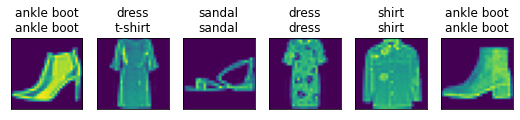

In [31]:
predict_fashion_mnist(LeNet_5, mnist_test)

In [32]:
training_loss = evaluate_loss(LeNet_5, mnist_train)
validation_loss = evaluate_loss(LeNet_5, mnist_test)

print(f"Model: LeNet-5 (Original)")
print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Model: LeNet-5 (Original)
Training Loss (60000 samples): 
0.4479252826054891
Validation Loss (10000 samples): 
0.4759952962875366


In [33]:
training_accuracy = evaluate_accuracy(LeNet_5, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5, mnist_test)

print(f"Model: LeNet-5 (Original)")
print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Model: LeNet-5 (Original)
Training accuracy (60000 samples): 
0.8276666666666667
Validation accuracy (10000 samples): 
0.8176


In [4]:
LeNet_5_maxPooling = LeNet(
    Reshape(),
    C1,
    nn.Sigmoid(),
    S2_maxPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_maxPooling,
    Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5_maxPooling.initialize(learning_rate=0.9)
LeNet_5_maxPooling.apply(init_weights)
LeNet_5_maxPooling.train(mode=True, data=mnist_train, epochs=10)

[epoch 1, batch 46] loss: 2.364226890646893
[epoch 1, batch 92] loss: 2.3128367558769556
[epoch 1, batch 138] loss: 2.3071447818175606
[epoch 1, batch 184] loss: 2.304844213568646
[epoch 1, batch 230] loss: 2.284157421277917
[epoch 2, batch 46] loss: 2.080947774907817
[epoch 2, batch 92] loss: 1.2938642424085867
[epoch 2, batch 138] loss: 1.0808033075021661
[epoch 2, batch 184] loss: 0.9883258277955262
[epoch 2, batch 230] loss: 0.9397820921047874
[epoch 3, batch 46] loss: 0.9505127098249353
[epoch 3, batch 92] loss: 0.7792616927105448
[epoch 3, batch 138] loss: 0.7435895735802858
[epoch 3, batch 184] loss: 0.7189996527588886
[epoch 3, batch 230] loss: 0.704795452563659
[epoch 4, batch 46] loss: 0.7232263677794001
[epoch 4, batch 92] loss: 0.6560670059660206
[epoch 4, batch 138] loss: 0.6478822905084362
[epoch 4, batch 184] loss: 0.619261358095252
[epoch 4, batch 230] loss: 0.5991244361452435
[epoch 5, batch 46] loss: 0.6861173536466516
[epoch 5, batch 92] loss: 0.5826920186695845
[epo

LeNet(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten()
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

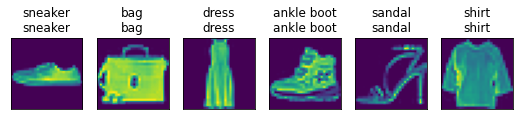

In [5]:
predict_fashion_mnist(LeNet_5_maxPooling, mnist_test)

In [6]:
training_loss = evaluate_loss(LeNet_5_maxPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_maxPooling, mnist_test)

print(f"Model: LeNet-5 (Simplified + MaxPooling)")
print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Model: LeNet-5 (Simplified + MaxPooling)
Training Loss (60000 samples): 
0.39734793586730954
Validation Loss (10000 samples): 
0.428904225730896


In [7]:
training_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_maxPooling, mnist_test)

print(f"Model: LeNet-5 (Simplified + MaxPooling)")
print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Model: LeNet-5 (Simplified + MaxPooling)
Training accuracy (60000 samples): 
0.8516
Validation accuracy (10000 samples): 
0.8392


In [8]:
LeNet_5_avgPooling = LeNet(
    C1,
    nn.Sigmoid(),
    S2_avgPooling,
    C3_simplified,
    nn.Sigmoid(),
    S4_avgPooling,
    Flatten(),
    C5,
    nn.Sigmoid(),
    F6,
    nn.Sigmoid(),
    RBF,
    verbose=True
)
LeNet_5_avgPooling.initialize(learning_rate=0.9)
LeNet_5_avgPooling.apply(weight_reset)
LeNet_5_avgPooling.apply(init_weights)
LeNet_5_avgPooling.train(mode=True, data=mnist_train, epochs=10)

[epoch 1, batch 46] loss: 2.3720474450484565
[epoch 1, batch 92] loss: 2.309841187103935
[epoch 1, batch 138] loss: 2.308414910150611
[epoch 1, batch 184] loss: 2.3067224647687827
[epoch 1, batch 230] loss: 2.305572395739348
[epoch 2, batch 46] loss: 2.5557319185008174
[epoch 2, batch 92] loss: 2.303235271702642
[epoch 2, batch 138] loss: 2.299974068351414
[epoch 2, batch 184] loss: 2.2656321681064107
[epoch 2, batch 230] loss: 1.7633023806240247
[epoch 3, batch 46] loss: 1.4038637798765432
[epoch 3, batch 92] loss: 1.087056242901346
[epoch 3, batch 138] loss: 1.0486566035643867
[epoch 3, batch 184] loss: 0.9781228394612022
[epoch 3, batch 230] loss: 0.9083923554938772
[epoch 4, batch 46] loss: 0.9935335983400759
[epoch 4, batch 92] loss: 0.847402054330577
[epoch 4, batch 138] loss: 0.7876654111820719
[epoch 4, batch 184] loss: 0.7630452293416728
[epoch 4, batch 230] loss: 0.7408233647761138
[epoch 5, batch 46] loss: 0.8120195580565411
[epoch 5, batch 92] loss: 0.7102591887764309
[epoc

LeNet(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

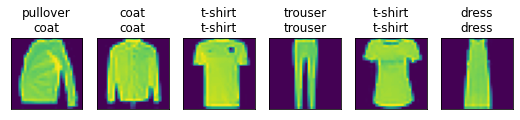

In [9]:
predict_fashion_mnist(LeNet_5_avgPooling, mnist_test)

In [10]:
training_loss = evaluate_loss(LeNet_5_avgPooling, mnist_train)
validation_loss = evaluate_loss(LeNet_5_avgPooling, mnist_test)

print(f"Model: LeNet-5 (Simplified + AvgPooling)")
print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Model: LeNet-5 (Simplified + AvgPooling)
Training Loss (60000 samples): 
0.5341423285166422
Validation Loss (10000 samples): 
0.5627992839336395


In [11]:
training_accuracy = evaluate_accuracy(LeNet_5_avgPooling, mnist_train)
validation_accuracy = evaluate_accuracy(LeNet_5_avgPooling, mnist_test)

print(f"Model: LeNet-5 (Simplified + AvgPooling)")
print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Model: LeNet-5 (Simplified + AvgPooling)
Training accuracy (60000 samples): 
0.7951666666666667
Validation accuracy (10000 samples): 
0.784
